### LINEAR REGRESSION

Import libraries

In [19]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

*__INPUT AND OUTPUT__*

x are the variables that we input and y are the real outcomes.
This means that when we input x=5 in our fucntion the outcome will be y=5

*EXAMPLE*

- f(x) = y
- f(x) = b0 + b1x
- x=5
- f(5)=  b0 + b1*5
- f(5) = 5
- __y=5__

In [20]:
x = np.array([2, 17, 27, 37, 47, 57])
y = np.array([2, 22, 16, 34, 24, 40])
print(f'this is x : {x}')
print(f'this is y : {y}')

this is x : [ 2 17 27 37 47 57]
this is y : [ 2 22 16 34 24 40]


*__PLOT THE DATA POINTS__*

Plotting the data is very important to see how it is distributed. 

In our case is it very important to see it before bringig out a linear regression analysis.

Create an instance of a plot and use it moreover in the analysis by adding pieces.

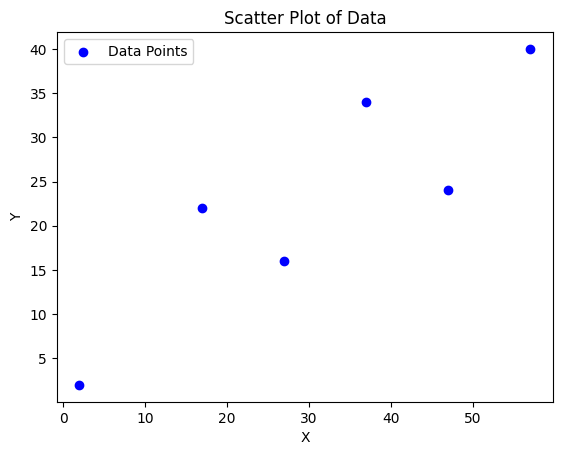

In [21]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

*__RESHAPE INPUT__*

The reshape(-1,1) is needed because most of the machine learning models expect the inputs to be 2D instead of 1D because they tipically need (n_samples, n_features). As in our example linear regression will need a 2D input.

In [22]:
x = x.reshape((-1,1))
print(f'this is reshaped x : {x}')

this is reshaped x : [[ 2]
 [17]
 [27]
 [37]
 [47]
 [57]]


*__CREATE THE INSTANCE OF THE MODEL__*

skclearn takes care of the implementation of the linear regression, so we just create the instance and we don't need to bother about anything else.

In [23]:
Ln = LinearRegression()

*__FIT THE MODEL__*

fitting the model means passing to the instance of the model just created the inputs with the corresponding outputs.
THis way the model will be trained gaining knowledge of the inputs we passed.
The model learns that for certain x's input the outcome will be the corresponding y. 

In [24]:
Ln.fit(x,y)

LinearRegression()

*__RETRIEVE FITTING RESULTS__*

Now Linear regression has been performed on the inputs we passed.

The score function returns a metric of how well our model performs on the data it has been trained on.

R^2 is the output of the function also named Coefficient of Determination. It is the metric we are talking about here above

It is calculated based on the sum of residuals...more on this later.

In [25]:
Sc = Ln.score(x,y)
print(f' R^2 is {Sc}')

 R^2 is 0.7574233661736804


*__PRINT COEFFICIENTS (WEIGHTS)__*

In our case we are working with a linear model with a single feature x. We are then interested in :

- intercept (b0)
- only coefficient we have in our case (b1) 

f(x) = b0 + b1*x

In [26]:
print(f' coefficient b1 value is {Ln.intercept_}')
print(f' coefficient b1 value is {Ln.coef_}')

 coefficient b1 value is 4.8783505154639215
 coefficient b1 value is [0.5814433]


*__PREDICTING OUTCOMES__*

Now we have trained the model and we know how well it performs so we could try to input new X's without showing the model the corresponding Y's to see what are its predictions.

For the moment we wil feed the model with the same x's with which we trained it.

Lastly we are gonna plot the predictions

In [27]:
y_pred = Ln.predict(x)
# flat it for a better visualization of the printing
print(f"inputted x's :{x.flatten()}")
print(f'predcited values : {y_pred}')

inputted x's :[ 2 17 27 37 47 57]
predcited values : [ 6.04123711 14.7628866  20.57731959 26.39175258 32.20618557 38.02061856]


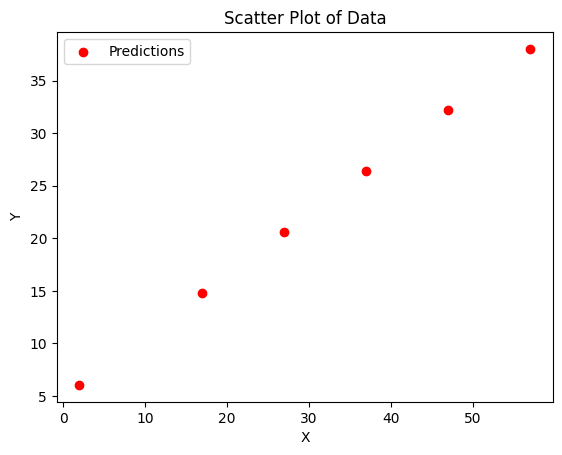

In [28]:
plt.scatter(x, y_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

*__PLOT THE LINEAR FUNCTION__*

It is immediately possible to see the pattern of the prediction on the bove plot. the line will pass through those point.

recall : f(x) = b0 + b1*x

we know now b0 and b1 so we can come up with the linear function

Remember the scalar * vector multiplication

In [29]:
line = Ln.intercept_ + (Ln.coef_*x)
print(line)

[[ 6.04123711]
 [14.7628866 ]
 [20.57731959]
 [26.39175258]
 [32.20618557]
 [38.02061856]]


*__PLOT LINE PREDICTIONS AND REAL VALUES__*

plotting everything together gives us a good visualization of the real data and our predictions.

It will be possible to see the regression line we've fitted which will be passing through the prediction points.

We will be able to see how far the predictions are fro the real values. 

__The distance from the predictions to the real values is the measure for which we can evaluate how well performing our model is. The closes the real point are to the realizations, the better performing the model is. This is resumes what we left behind before about the Sum of residuals.__

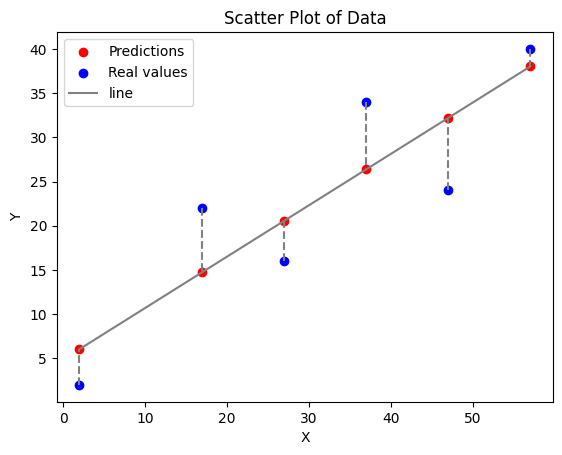

In [30]:
plt.scatter(x, y_pred, color='red', label='Predictions')
plt.scatter(x, y, color='blue', label='Real values')

# Plot lines from real data points to the regression line
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='gray', linestyle='--')

plt.plot(x,line, color='gray', label='line' )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

*__GENERALIZATION OF THE MODEL (EXPLANATION OF THE LINE)__*

The model needs to generalize in the best way possible the predictions it is going to make so the line seems to be in between the points. 

This helps reducing overfitting. 

Linear regression is though a very simple model and is not very flexible, as you can see once it fits the line, the predictions will lay on on the line and the line needs to generalize for all the datapoints it has been trained for. 

*__SUM OF SQUARED ERRORS (EXPLANATION)__*

The some of squared errors is the metrics used to define how well our model is performing. it is the sum between all the differences between the realizations and the real values. 

The squares is used to make all the differences positives

*EXAMPLE*

p = prediction, r = real value, SSE = sum of squared errors

p = 4, r = 2
p = 7, r = 4
p = 10, r = 16

SSE = (4-2)^2 + (7-4)^2 + (16-10)^2 = 4 + 9 + 36 = 49

By minimizing the SSE we are reducing the differences between the predicted values and the real values, reducing the overall error. 

The minimal the SSE, the better performing the model is.

*__VISUALIZATION OF A BETTER PERFORMING MODEL__*

Fitting the model with closer datapoints will give us the chance to fit a line that generalizes better the predictions.

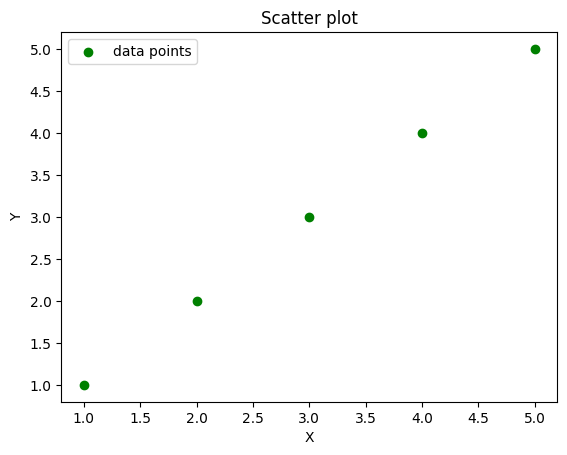

In [31]:
new_x = np.array([1,2,3,4,5]).reshape((-1,1))
new_y = np.array([1,2,3,4,5])

new_ln = LinearRegression().fit(new_x,new_y)

plt.scatter(new_x,new_y, color='green', label='data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot')
plt.legend()
plt.show()

*__LOOKING AT THE SCORE__*

Given the visual interpretation of the plot above we can induce that the performance of our model will be very very good...perfect.

In [32]:
new_sc = new_ln.score(new_x,new_y)
print(new_sc)

1.0


*__PREDICT USING MODEL__*

As before lets feed our model with the same x's we've inputted before to train it.

In [33]:
new_y_pred = new_ln.predict(new_x)

*__PLOT EVERYTHING__*

The predictions will be perfect and will be covering the real values on the plot...

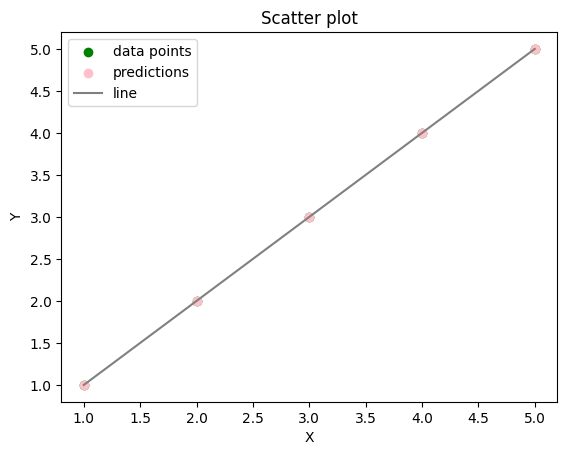

In [34]:
plt.scatter(new_x,new_y, color='green', label='data points')
plt.scatter(new_x,new_y_pred, color='pink', label='predictions')

# Plot lines from real data points to the regression line
for i in range(len(new_x)):
    plt.plot([new_x[i], new_x[i]], [new_y[i], new_y_pred[i]], color='gray', linestyle='--')

plt.plot(new_x, new_ln.intercept_ + (new_ln.coef_*new_x), color='gray', label='line' )

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot')
plt.legend()
plt.show()